## Faisal Akhtar
## College Roll No.: 17/1409

Q2)<br>
Iris plants dataset (already available in Scikit Learn) has the following characteristics:<br>
Number of Instances: 150 (50 in each of three classes)<br>
Number of Attributes: 4 numeric, predictive attributes and the class<br>
Attribute Information: sepal length in cm, sepal width in cm, petal length in cm, petal width in cm Class: Iris-Setosa, Iris-Versicolour, Iris-Virginica<br>
Missing Attribute Values: None<br><br>
Write a program using Scikit Learn that utilizes Logistic regression to build a classification model using all the four features to predict the class of a plant. Print the confusion matrix, accuracy, precision and recall for the model.<br><br>
Also, build a classification model in Scikit Learn using Neural Networks using all the features to predict the class a plant belongs to. Print the confusion matrix, accuracy, precision and recall for the model and compare its performance with the model created using Logistic regression. 

# Classification Model using Logistic Regression

### Loading data

In [1]:
import pandas as pd
data=pd.read_csv('../input/IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Preparing the training set

In [3]:
# X = feature values, all the columns except the last column
X=data.iloc[:,:-1]

# Y = target values, last column of the data frame
Y=data.iloc[:,-1]

### Plotting the relation of each feature with each species

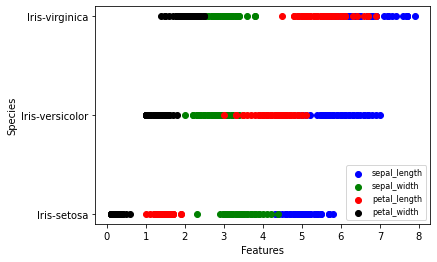

In [4]:
import matplotlib.pyplot as plt

plt.xlabel('Features')
plt.ylabel('Species')

pltX = data.loc[:, 'sepal_length']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='blue', label='sepal_length')

pltX = data.loc[:, 'sepal_width']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='green', label='sepal_width')

pltX = data.loc[:, 'petal_length']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='red', label='petal_length')

pltX = data.loc[:, 'petal_width']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='black', label='petal_width')

plt.legend(loc=4, prop={'size':8})
plt.show()

### Splitting the data into 80% training and 20% testing

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

In [6]:
print("x_train shape : ", x_train.shape) 
print("x_test shape  : ", x_test.shape) 
print("y_train shape : ", y_train.shape) 
print("y_test shape  : ", y_test.shape)

x_train shape :  (120, 4)
x_test shape  :  (30, 4)
y_train shape :  (120,)
y_test shape  :  (30,)


### Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
predictions = model.predict(x_test)
print(predictions)

['Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica']


### Confusion matrix and accuracy of the model

In [13]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix : \n",cm)

Confusion Matrix : 
 [[ 9  0  0]
 [ 0 11  1]
 [ 0  0  9]]


In [14]:
from sklearn.metrics import accuracy_score

print('Accuracy Score :',accuracy_score(y_test, predictions))

Accuracy Score : 0.9666666666666667


### Checking precision, recall and f1-score of the model

In [9]:
from sklearn.metrics import classification_report

print( classification_report(y_test, predictions) )

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



# Classification model using Neural Network

In [15]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
data.shape

(150, 5)

### Preprocessing

### Encoding Categorical Values

In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["species"] = labelencoder.fit_transform(data["species"])
species = pd.DataFrame({'species': ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']})

In [25]:
import numpy as np
print ('Class labels:', np.unique(data["species"]))

Class labels: [0 1 2]


### Test Train split

In [26]:
# X = feature values, all the columns except the last column
X=data.iloc[:,:-1]

# Y = target values, last column of the data frame
Y=data.iloc[:,-1]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

In [28]:
print("x_train shape : ", x_train.shape) 
print("x_test shape  : ", x_test.shape) 
print("y_train shape : ", y_train.shape) 
print("y_test shape  : ", y_test.shape)

x_train shape :  (120, 4)
x_test shape  :  (30, 4)
y_train shape :  (120,)
y_test shape  :  (30,)


In [30]:
print ('Lables count in y:', np.bincount(Y))
print('Lables counts in y_train:', np.bincount(y_train))
print('Lables counts in y_test:', np.bincount(y_test))

Lables count in y: [50 50 50]
Lables counts in y_train: [41 38 41]
Lables counts in y_test: [ 9 12  9]


### Scaling IRIS data with StandardScaler

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

### Perceptron

In [32]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter = 40, eta0=0.1, random_state=1)
ppn.fit(x_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
ypred = ppn.predict(x_test_std)

### Confusion matrix and accuracy of the model

In [35]:
cm = confusion_matrix(y_test, ypred)
print("Confusion Matrix : \n",cm)

Confusion Matrix : 
 [[9 0 0]
 [1 9 2]
 [0 0 9]]


In [40]:
print('Accuracy Score :',accuracy_score(y_test, ypred))

Accuracy Score : 0.9


### Checking precision, recall and f1-score of the model

In [39]:
print( classification_report(y_test, ypred) )

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.75      0.86        12
           2       0.82      1.00      0.90         9

    accuracy                           0.90        30
   macro avg       0.91      0.92      0.90        30
weighted avg       0.92      0.90      0.90        30



# Comparing performances

<table>
    <tr>
        <th>MODEL</th>
        <th>Accuracy</th>
        <th>Precision</th>
        <th>Recall</th>
        <th>F1-Score</th>
    </tr>
    <tr>
        <td>Logistic regression</td>
        <td>0.9666666666666667</td>
        <td>0.97</td>
        <td>0.97</td>
        <td>0.97</td>
    </tr>
    <tr>
        <td>Perceptron</td>
        <td>0.9</td>
        <td>0.92</td>
        <td>0.9</td>
        <td>0.9</td>
    </tr>
</table>